In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

loading in the Boston data set from sklearn

In [2]:
Boston = load_boston()

The number of rows and columns in this data set along with what the rows and columns represent

In [3]:
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
target = pd.Series(Boston.target, name='target')

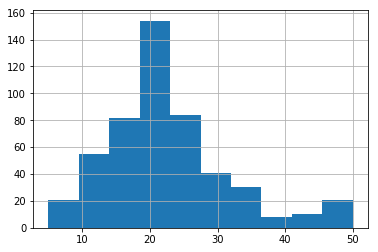

In [5]:
target.hist()

In [6]:
df = pd.DataFrame(data=Boston.data, columns=Boston.feature_names)

In [7]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


pairwise scatterplots of the predictors (columns) in this data set

In [9]:
pd.plotting.scatter_matrix(df, figsize=(15,10))
plt.show()

predictors associated with per capita crime rate

crime per capita and nitric oxides concentration


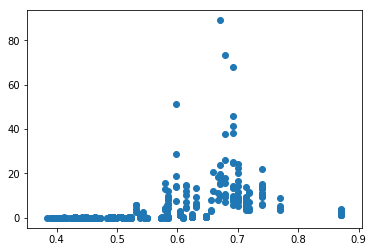

In [10]:
print('crime per capita and nitric oxides concentration')
plt.scatter(df.NOX, df.CRIM)
plt.show()

In [11]:
print('crime per capita and average number of rooms per dwelling')
plt.scatter(df.RM, df.CRIM)
plt.show()

crime per capita and average number of rooms per dwelling


In [12]:
print('crime per capita and proportion of owner-occupied units built prior to 1940')
plt.scatter(df.AGE, df.CRIM)
plt.show()

crime per capita and proportion of owner-occupied units built prior to 1940


In [13]:
print('crime per capita and weighted and distances to five Boston employment centres')
plt.scatter(df.DIS, df.CRIM)
plt.show()

crime per capita and weighted and distances to five Boston employment centres


In [14]:
print('crime per capita and proportion of blacks by town')
plt.scatter(df.B, df.CRIM)
plt.show()

crime per capita and proportion of blacks by town


In [15]:
print('crime per capita and % lower status of the population')
plt.scatter(df.LSTAT, df.CRIM)
plt.show()

crime per capita and % lower status of the population


the suburbs of Boston appear to have particularly high crime rates, Tax rates, and Pupil-teacher ratios

In [16]:
df.CRIM.hist()

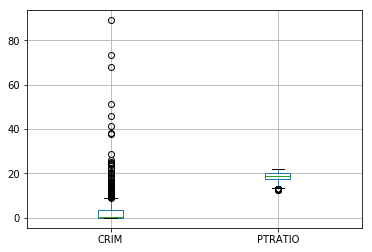

In [17]:
df[['CRIM', 'PTRATIO']].boxplot()
plt.show()

In [18]:
df[['TAX']].boxplot()

the number of suburbs in this data set bound the Charles river

In [19]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

median pupil-teacher ratio among the towns in this data set

In [20]:
df.PTRATIO.median()

19.05

suburb of Boston has lowest median value of owneroccupied homes

In [21]:
df2 = pd.concat([df, target], axis=1)

In [22]:
df2[df2.target==target.median()]

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
44   0.12269  0.0   6.91   0.0  0.448  6.069  40.0  5.7209   3.0  233.0   
78   0.05646  0.0  12.83   0.0  0.437  6.232  53.7  5.0141   5.0  398.0   
116  0.13158  0.0  10.01   0.0  0.547  6.176  72.5  2.7301   6.0  432.0   
485  3.67367  0.0  18.10   0.0  0.583  6.312  51.9  3.9917  24.0  666.0   
498  0.23912  0.0   9.69   0.0  0.585  6.019  65.3  2.4091   6.0  391.0   

     PTRATIO       B  LSTAT  target  
44      17.9  389.39   9.55    21.2  
78      18.7  386.40  12.34    21.2  
116     17.8  393.30  12.04    21.2  
485     20.2  388.62  10.58    21.2  
498     19.2  396.90  12.92    21.2

average rooms per dwelling

In [23]:
round(df.RM).value_counts()

6.0    312
7.0    125
5.0     37
8.0     24
4.0      5
9.0      3
Name: RM, dtype: int64

the suburbs average more than seven rooms per dwelling

In [24]:
df2[df2.RM>7]

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
2     0.02729   0.0   7.07   0.0  0.4690  7.185  61.1  4.9671   2.0  242.0   
4     0.06905   0.0   2.18   0.0  0.4580  7.147  54.2  6.0622   3.0  222.0   
40    0.03359  75.0   2.95   0.0  0.4280  7.024  15.8  5.4011   3.0  252.0   
55    0.01311  90.0   1.22   0.0  0.4030  7.249  21.9  8.6966   5.0  226.0   
64    0.01951  17.5   1.38   0.0  0.4161  7.104  59.5  9.2229   3.0  216.0   
..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
364   3.47428   0.0  18.10   1.0  0.7180  8.780  82.9  1.9047  24.0  666.0   
370   6.53876   0.0  18.10   1.0  0.6310  7.016  97.5  1.2024  24.0  666.0   
375  19.60910   0.0  18.10   0.0  0.6710  7.313  97.9  1.3163  24.0  666.0   
453   8.24809   0.0  18.10   0.0  0.7130  7.393  99.3  2.4527  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.5320  7.061  77.0  3.4106  24.0  666.0   

     PTRATIO       B  LSTAT  target  
2       17.8  392.83   4.03    34.7  
4       18.7  396.90   5.33    36.2  
40      18.3  395.62   1.98    34.9  
55      17.9  395.93   4.81    35.4  
64      18.6  393.24   8.05    33.0  
..       ...     ...    ...     ...  
364     20.2  354.55   5.29    21.9  
370     20.2  392.05   2.96    50.0  
375     20.2  396.90  13.44    15.0  
453     20.2  375.87  16.74    17.8  
482     20.2  395.28   7.01    25.0  

[64 rows x 14 columns]

the suburbs average more than eight rooms per dwelling

In [25]:
df2[df2.RM>8]

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
97   0.12083   0.0   2.89   0.0  0.4450  8.069  76.0  3.4952   2.0  276.0   
163  1.51902   0.0  19.58   1.0  0.6050  8.375  93.9  2.1620   5.0  403.0   
204  0.02009  95.0   2.68   0.0  0.4161  8.034  31.9  5.1180   4.0  224.0   
224  0.31533   0.0   6.20   0.0  0.5040  8.266  78.3  2.8944   8.0  307.0   
225  0.52693   0.0   6.20   0.0  0.5040  8.725  83.0  2.8944   8.0  307.0   
226  0.38214   0.0   6.20   0.0  0.5040  8.040  86.5  3.2157   8.0  307.0   
232  0.57529   0.0   6.20   0.0  0.5070  8.337  73.3  3.8384   8.0  307.0   
233  0.33147   0.0   6.20   0.0  0.5070  8.247  70.4  3.6519   8.0  307.0   
253  0.36894  22.0   5.86   0.0  0.4310  8.259   8.4  8.9067   7.0  330.0   
257  0.61154  20.0   3.97   0.0  0.6470  8.704  86.9  1.8010   5.0  264.0   
262  0.52014  20.0   3.97   0.0  0.6470  8.398  91.5  2.2885   5.0  264.0   
267  0.57834  20.0   3.97   0.0  0.5750  8.297  67.0  2.4216   5.0  264.0   
364  3.47428   0.0  18.10   1.0  0.7180  8.780  82.9  1.9047  24.0  666.0   

     PTRATIO       B  LSTAT  target  
97      18.0  396.90   4.21    38.7  
163     14.7  388.45   3.32    50.0  
204     14.7  390.55   2.88    50.0  
224     17.4  385.05   4.14    44.8  
225     17.4  382.00   4.63    50.0  
226     17.4  387.38   3.13    37.6  
232     17.4  385.91   2.47    41.7  
233     17.4  378.95   3.95    48.3  
253     19.1  396.90   3.54    42.8  
257     13.0  389.70   5.12    50.0  
262     13.0  386.86   5.91    48.8  
267     13.0  384.54   7.44    50.0  
364     20.2  354.55   5.29    21.9